# Quadratic Form and Eigenvalues

We have the following quadratic form $Q(x)$:
$$ Q(x) = x^T H x $$

then 
$$ \lambda_m ||x||^2 \leq Q(x) \leq \lambda_M ||x||^2 $$

Where:
- $ \lambda_m = \min_i \lambda_i $
- $ \lambda_M = \max_i \lambda_i $

Here, $ Q(x) $ is a quadratic form, and $ \lambda $ is an eigenvalue of $ H $.

## Proof Using Lagrange Multiplier

### Constraint
Our constraint is:

$$ \sum_{i=1}^n x_i^2 = r^2 $$

### Lagrange Function
We define the Lagrange function as:

$$ L(\lambda, x) = Q(x) - \lambda \left( \sum_{i=1}^n x_i^2 - r^2 \right) $$

Now, let's find the critical points by taking the gradient:

$$
\nabla_x L = \nabla_x (x^T H x) - \lambda \nabla_x \left( \sum_{i=1}^n x_i^2 - r^2 \right) = 0
$$

This leads to:

$$
\begin{eqnarray*}
(H + H^T) x - \lambda (I+ I^T) x = 0 \\
 \Longleftrightarrow  (H - \lambda E) x = 0 \\
 \end{eqnarray*}
$$

Solving for $ \lambda $ with the constraint $ \sum_{i=1}^n x_i^2 = 1 $ , we get:

$$
\lambda = \lambda_1, \ldots, \lambda_n \quad \text{and} \quad x = x^{(1)}, \ldots, x^{(n)}
$$

Where each $ \lambda_i $ is an eigenvalue of $ H $ and $ x^{(i)} $ is a unit eigenvector corresponding to it.

Each $ x^{(i)} $ is a local minimum or maximum of $ Q(x) $ with the constraint. We can express $ Q(x) $ as:

$$ Q(x) = x^T H x = x^T \lambda x = \lambda ||x||^2 $$

So, we have:

$$ \lambda_m ||x||^2 \leq Q(x) \leq \lambda_M ||x||^2 $$


# Plot the result of this problem 

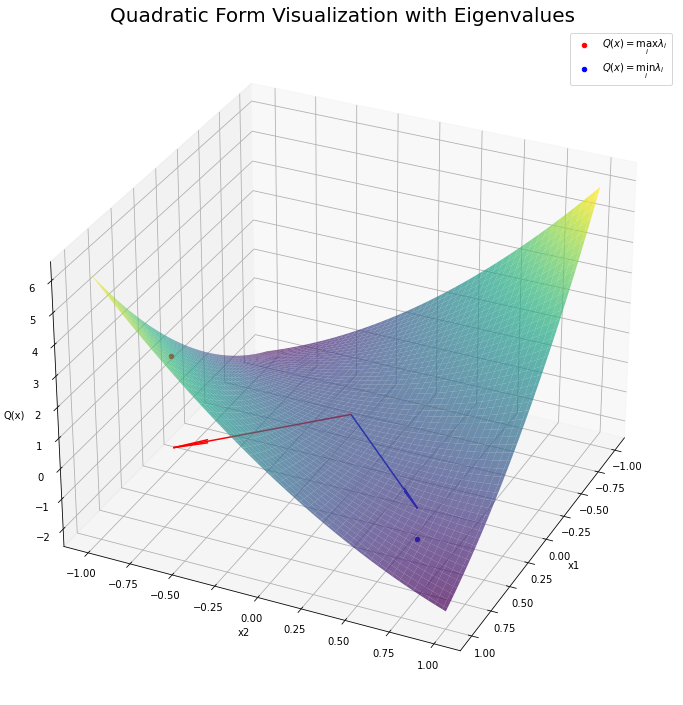

{'Eigenvalue 1': 3.0000000000000004, 'Eigenvector 1': array([ 0.70710678, -0.70710678])}
{'Eigenvalue 2': -0.9999999999999996, 'Eigenvector 2': array([0.70710678, 0.70710678])}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the quadratic form Q(x) = x^T @ H @ x
H = np.array([[1, -2],
              [-2, 1]])

# Compute the eigenvalues and eigenvectors of H
eigenvalues, eigenvectors = np.linalg.eig(H)

# Normalize the eigenvectors
eigenvectors_normalized = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

# Create a range of values for theta (angle in radians)
theta = np.linspace(0, 2 * np.pi, 100)
points_on_circle = np.array([np.cos(theta), np.sin(theta)])

# Create a 3D plot using ax and fig
fig = plt.figure(figsize=(12, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the quadratic function Q(x) = x^T @ H @ x
X = np.linspace(-1, 1, 100)
Y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(X, Y)
Z = np.zeros_like(X)
for i in range(len(X)):
    for j in range(len(Y)):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = x.T @ H @ x

# Plot the 3D surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Plot the unit eigenvectors as arrows with enlarged heads
colors = ['r', 'b']
origin = np.zeros(2)
for i in range(len(eigenvalues)):
    ax.quiver(
        origin[0], origin[1], 0,
        eigenvectors_normalized[0, i], eigenvectors_normalized[1, i], 0,
        color=colors[i],
        pivot='tail',  
        arrow_length_ratio=0.2
    )
    # plot local minimum and maximum values on the circle
    if i == eigenvalues.argmax():
        label = '$Q(x)= \max_i \lambda_i$'
    elif i == eigenvalues.argmin():
        label = '$Q(x)= \min_i \lambda_i$'
    else:
        label = '$Q(x)= \lambda$'
    ax.scatter(eigenvectors_normalized[0, i], eigenvectors_normalized[1, i], eigenvalues[i], color=colors[i], label=label)

# Label axes and set plot title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Q(x)')
ax.view_init(elev=30, azim=25)
ax.legend()
ax.set_title('Quadratic Form Visualization with Eigenvalues', fontsize=20)

# Show the plot
plt.show()

# Print the eigenvalues and eigenvectors
for i in range(len(eigenvalues)):
    result = {f"Eigenvalue {i+1}": eigenvalues[i],
             f"Eigenvector {i+1}": eigenvectors[:, i]
             }
    print(result)



In [2]:
1

1